In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-1) Understand relationship in terms of sales for the village food market

-2) % of veggies that each farm contributed to the box program over it's entire existence (note summer box ends at end of oct, and winter box is november 1 time, these should be seen separately.)

-3) create graphs that are useful on the business plan and thus for the loan application. ie. sales over time (overall and then broken into commerical and box), sales projections (with box starting in june and running until the end of oct), and a 10% increase in commercial sales, etc.

-4) through manipulating the data perhaps we can come up with a way to improve the 'harvest list' sheets (create a static template) and see if more or less data needs to be collected.

-5) be able to show a ranked list of which vegetables sold the most to the least in 2016.

# This is a cleaned version of all the excel spreadsheets.

In [4]:
gab_farm = pd.read_csv('gabriola_farm_2016.csv')

In [7]:
# This is a cleaned version of all the items. I grouped all the Summer Squash together and the Salad Greens and 
# Mixed Greens together.
gab_farm.Item.unique()

array(['Kale', 'Lettuce', 'Spinach', 'Kale (Baby)', 'Salad Greens', 'Mint',
       'Garlic Scapes', 'Broccoli', 'Swiss Chard', 'Beets', 'Basil',
       'Arugula', 'Hakurei', 'Zucchini', 'Beets [Golden]',
       'Beets [Chiogga]', 'Cauliflower', 'Carrots', 'Summer Squash',
       'Beans [Fava]', 'Cucumbers', 'Kolhrabi', 'Onion', 'Onions [Walla]',
       'Fennel', 'Beans [Bush]', 'Tomatoes', 'Peppers [Hot]', 'Bok Choi',
       'Leek', 'Potatoes', 'Dill', 'Peppers', 'Tomatoes [Cherry]', 'Corn',
       'Celery', 'Eggplant', 'Garlic', 'Magenta Diakon', 'Ground Cherries',
       'Tomatoes [Roma]', 'Turnip', 'Romas', 'Radishes', 'Squash',
       'Squash[mini]', 'Salad Turnips', 'Cabbage', 'Parsnip',
       'Scarlette Queen', 'mixed mustards', 'Half Box', 'Full Box'], dtype=object)

In [8]:
# This is the cleaned version of all the farm clients.
gab_farm.Client.unique()

array(['VFM', 'WoodFire', 'The Kitchen', 'EVENT - Becky', 'Event_Vanessa',
       "Robert's Place", 'Box', 'Event (Farm to Table)'], dtype=object)

In [110]:
gab_farm=gab_farm[["Source", "Client", "Item","Unit","Volume","Notes","Price for Farmer/unit","Total", "Invoiced", "Paid Farmer","Date"]]

In [57]:
gab_farm.head(10)

,Source,Client,Item,Unit,Volume,Notes,Price for Farmer/unit,Total,Invoiced,Paid Farmer,Date
0,Heart & Soil Organics,VFM,Kale,Bunches,30.0,NaN,3.00,90.0,Yes,Yes,2016-05-16
1,Heart & Soil Organics,VFM,Lettuce,ea (heads),15.0,NaN,3.50,52.5,Yes,Yes,2016-05-16
2,Heart & Soil Organics,VFM,Spinach,lbs (bulk),5.0,I will bag it into 1 lb bags when I come for t...,9.50,47.5,Yes,Yes,2016-05-16
3,Heart & Soil Organics,WoodFire,Kale (Baby),lbs (bulk),1.0,NaN,10.00,10.0,Yes,Yes,2016-05-16
4,40 x 40 Farm,WoodFire,Salad Greens,lbs (bulk),3.0,NaN,10.00,30.0,NaN,NaN,2016-05-16
5,40 x 40 Farm,VFM,Mint,Bunches,10.0,NaN,2.25,22.5,NaN,NaN,2016-05-16
6,Heart & Soil Organics,WoodFire,Kale (Baby),lbs (bulk),2.0,In a bin.,10.00,20.0,Yes,Yes,2016-05-27
7,40 x 40 Farm,WoodFire,Salad Greens,lbs (bulk),3.0,In a bin,10.00,30.0,Yes,NaN,2016-05-27
8,Heart & Soil Organics,WoodFire,Kale (Baby),lbs (bulk),2.0,In a bin.,10.00,20.0,Yes,NaN,2016-06-01
9,Heart & Soil Organics,WoodFire,Salad Greens,lbs (bulk),2.0,In a bin.,10.00,20.0,Yes,NaN,2016-06-01


# 1) Understand relationship in terms of sales for the village food market

In [15]:
# Subset to just the village food market
vfm=gab_farm[gab_farm.Client=="VFM"]

In [18]:
# Total sales for each type of vegetable at the village food market
vfm.groupby(["Item","Unit","Price for Farmer/unit"]).sum()

Volume   Total
Item           Unit         Price for Farmer/unit                
Beans [Bush]   Bags         3.25                     82.0  266.50
Beans [Fava]   Bags         2.60                     12.0   31.20
Beets          Bags         3.75                     84.0  315.00
                            4.50                      5.0   22.50
               Bunches      2.75                     44.0  121.00
Bok Choi       Bags         1.50                      5.0    7.50
                            1.75                      5.0    8.75
Broccoli       Bunches      3.50                     12.0   42.00
               lbs          4.00                     10.0   40.00
Carrots        Bags         3.25                     20.0   65.00
                            3.50                     10.0   35.00
               Bunches      3.25                     14.0   45.50
                            3.50                     20.0   70.00
Cauliflower    lbs          2.75                     12.5   34.38
Cucumbers      Each         1.25                     98.0  122.50
Eggplant       Bags         3.75                     15.0   56.25
               lbs          3.00                     10.0   30.00
Fennel         Each         2.40                      5.0   12.00
Garlic Scapes  lbs          6.00                      2.0   12.00
Kale           Bunches      2.50                    182.0  455.00
                            3.00                     78.0  234.00
Kale (Baby)    lbs          10.00                     1.5   15.00
Kolhrabi       lbs          3.00                     10.0   30.00
Leek           lbs          2.35                     75.0  176.25
                            2.40                     10.0   24.00
Lettuce        Each         2.50                     14.0   35.00
               Heads        2.50                     86.0  215.00
                            3.50                     68.0  238.00
               Units        2.50                      7.0   17.50
               ea (heads)   3.50                     15.0   52.50
Mint           Bunches      2.00                     14.0   28.00
                            2.25                     10.0   22.50
                            10.00                     3.0   30.00
Onion          lbs          1.50                     25.0   37.50
Onions [Walla] lbs          1.50                     50.0   75.00
Peppers        Bags         5.00                     37.0  185.00
               lbs          3.75                      6.5   24.38
Peppers [Hot]  Bags         2.50                      9.0   22.50
               Pints        2.50                     15.0   37.50
Radishes       Bunches      2.50                     10.0   25.00
Salad Greens   bulk         10.00                     2.0   20.00
               lbs          10.00                    35.0  350.00
               lbs (bagged) 10.00                     4.5   45.00
               lbs (bulk)   10.00                     2.0   20.00
Spinach        Bunches      3.00                     18.0   54.00
               lbs (bulk)   9.50                      5.0   47.50
Squash         lbs          1.10                     10.0   11.00
Squash[mini]   lbs          1.35                     20.0   27.00
Summer Squash  Bags         3.00                     26.0   78.00
               Each         1.25                    180.0  225.00
               Units        1.25                    127.0  158.75
Swiss Chard    Bunches      2.50                    159.0  397.50
                            3.00                     25.0   75.00
Zucchini       Each         1.25                     19.0   23.75

# Daily total sales in dollars at the Village Food Market over time

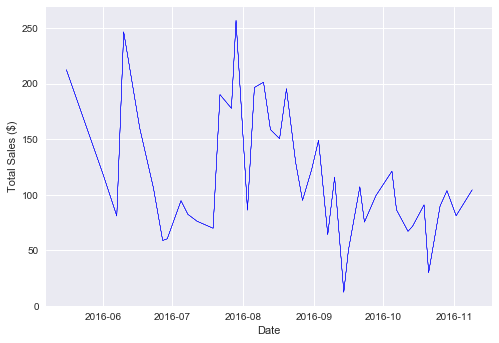

In [55]:
vfm_date=vfm.groupby(["Date"]).sum()
vfm_date=vfm_date.reset_index()
vfm_date["Date"]=pd.to_datetime(vfm_date.Date)
plt.plot(vfm_date.Date, vfm_date.Total, color="blue", linewidth=0.25)
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
#plt.title('Village Food Market Sales')
plt.show()

# 2) % of veggies that each farm contributed to the box program over it's entire existence (note summer box ends at end of oct, and winter box is november 1 time, these should be seen separately.)

In [61]:
#Subset of sales going to Food Boxes
box_program=gab_farm[gab_farm.Client=="Box"]
box_program["Date"]=pd.to_datetime(box_program.Date)

C:\Users\MSI_USER\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
#Food Boxes in 2016
box_2016=box_program[box_program.Date<pd.to_datetime('2016-10-31')]

In [67]:
#Food Boxes in 2017
box_2017=box_program[box_program.Date>=pd.to_datetime('2016-11-01')]

In [81]:
#Group the Food Boxes by Farm
box2016_grouped=box_2016.groupby("Source").sum()
box2017_grouped=box_2017.groupby("Source").sum()
box2016_grouped["Percent"]=box2016_grouped["Total"]/box2016_grouped.Total.sum()
box2017_grouped["Percent"]=box2017_grouped["Total"]/box2017_grouped.Total.sum()
box2016_grouped=box2016_grouped.reset_index()
box2017_grouped=box2017_grouped.reset_index()

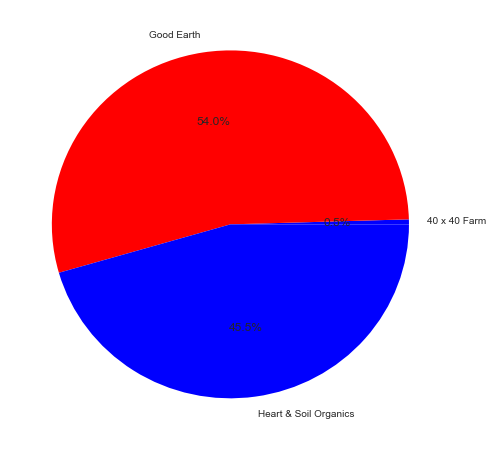

In [95]:
# 2016 Box Program Farm Percentages
fracs_2016 = box2016_grouped.Percent
colors = ['b', 'r']
fig, ax = plt.subplots(figsize=(8, 8))  # make the plot square
pie = ax.pie(fracs_2016, colors=colors, labels=box2016_grouped.Source,autopct='%1.1f%%')
plt.show()

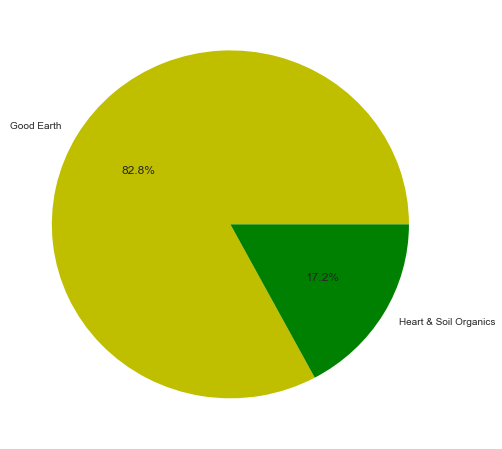

In [96]:
# 2017 Box Program Farm Percentages
fracs_2017 = box2017_grouped.Percent
colors = ['y', 'g']
fig, ax = plt.subplots(figsize=(8, 8))  # make the plot square
pie = ax.pie(fracs_2017, colors=colors, labels=box2017_grouped.Source,autopct='%1.1f%%')
plt.show()

# 3) create graphs that are useful on the business plan and thus for the loan application. ie. sales over time (overall and then broken into commerical and box), sales projections (with box starting in june and running until the end of oct), and a 10% increase in commercial sales, etc.

In [111]:
daily_sales=gab_farm.groupby(["Date"]).sum()
daily_sales=daily_sales.reset_index()
daily_sales["Date"]=pd.to_datetime(daily_sales.Date)
daily_sales["cumulative_sales"]=daily_sales.Total.cumsum()

## Plot of cumulative total sales over time

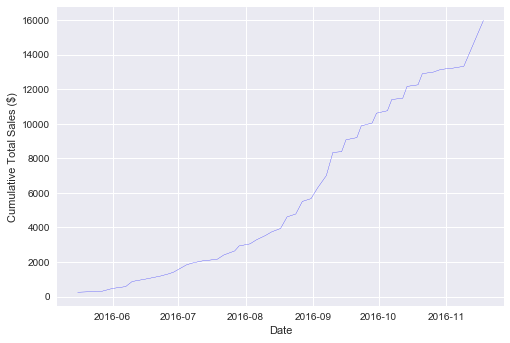

In [114]:
plt.plot(daily_sales.Date, daily_sales.cumulative_sales, color="blue", linewidth=0.25)
plt.xlabel('Date')
plt.ylabel('Cumulative Total Sales ($)')
#plt.title('Village Food Market Sales')
plt.show()

# 5) be able to show a ranked list of which vegetables sold the most to the least in 2016.

In [101]:
gab_farm.groupby(["Item"]).sum().sort("Total",ascending=False)
#This is ranked by total sales since we're mixing units.

C:\Users\MSI_USER\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Volume,Price for Farmer/unit,Total
Item,,,
Salad Greens,260.0,694.50,2457.00
Half Box,24.0,50.00,1200.00
Full Box,10.0,100.00,1000.00
Kale,373.5,109.00,976.75
Lettuce,303.0,85.25,921.25
Beets,268.0,96.00,894.75
Swiss Chard,291.0,98.00,752.50
Carrots,224.0,33.80,729.50
Potatoes,155.0,22.50,650.00
